In [2]:
# Original data: breast-cancer-wisconsin

import numpy as np
import pandas as pd
import os, sys
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn import datasets, metrics, model_selection, svm

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold


In [3]:
df1=pd.read_csv(r'C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\Project_3\BC_Data\BC_1.csv')
df1.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [3]:
#df2=pd.read_csv(r'C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\Project_3\BC_Data\BC_diagnostic_data.csv')
#df2.head()

In [4]:
#df3= pd.read_csv(r'C:\Users\muthukumar\Desktop\005_SaveNWBCSHere\03_Activities&HW\Project_3\BC_Data\BC_diagnostic_data_2.csv')
#df3.head()

In [4]:
df1 = df1.dropna()
df1 = df1.apply(pd.to_numeric)
#df1.head(30)

In [6]:
#df1.info()

# Training the XGBClassifier()

In [5]:
features=df1.loc[:,df1.columns!='Status'].values[:,1:]
labels=df1.loc[:,'Status'].values

In [6]:
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels
len(y)

683

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=7)

In [8]:
model1=XGBClassifier()
model1.fit(x_train,y_train)

[11:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\muthukumar\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
y_pred=model1.predict(x_test)
print('Accuracy of cancer prediction using XGBClassifier:' + str(accuracy_score(y_test, y_pred)*100))

Accuracy of cancer prediction using XGBClassifier:97.8102189781022


In [12]:
#module of XGBoost is plot_importance which provides e f-score of each feature,showing that feature’s importance to the model.

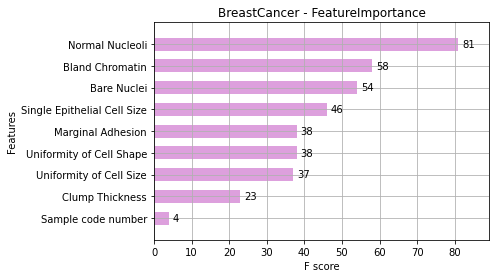

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
#model1.get_booster().feature_names = orig_feature_names
#orig_feature_names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Status']
#plot_importance(model1, grid=True, show_values=True,height=0.6, color='plum')
plot_importance(model1,grid=True, title = 'BreastCancer - FeatureImportance',show_values=True,height=0.6, color='plum').set_yticklabels(['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Status'])
#pyplot.show()
plt.savefig("bc_ftrimp.png",bbox_inches='tight')

# Training the Linear regression model

In [11]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data. (07-Ins_Data_Preprocessing)
scaler1 = StandardScaler()
#X = df1[["Clump Thickness", "Bare Nuclei", "Normal Nucleoli"]]
X = df1[["Clump Thickness"]]
#X = df1.loc[:,df1.columns!='Status']
y1 = df1["Status"].values.reshape(-1, 1)
#print(X.shape, y1.shape)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=42)
#print(X_test)

In [13]:
X_scaler = scaler1.fit(X_train)
y_scaler = scaler1.fit(y1_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y1_train)
y_test_scaled = y_scaler.transform(y1_test)

In [17]:
# fit the linear regression model
#If you are performing regression for a continuous outcome (i.e.linear regression) then you may use metrics such as:MSE, Fsquare 
#Rsquare value is a very popular metric used for evaluating the accuracy of a linear regression model.#R2 Score is the default scoring for many of the Sklearn models
#A "good" MSE score will be close to zero while a "good" R2 Score will be close to 1.

model2 = LinearRegression()
model2.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [20]:
predictions_lnr = model2.predict(X_test_scaled)

In [22]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y1_test, predictions_lnr)
r2 = model2.score(X_test, y1_test)
print(f"MSE from Linear Regression: {MSE}, R2 from Linear Regression: {r2}")

MSE from Linear Regression: 8.045723251972486, R2 from Linear Regression: -4.275391888987753


In [20]:
#A score of the model using the unseen testing data
#model2.score(X_test, y1_test)

In [23]:
#Plot the results of the regression model
model2.fit(X_train_scaled, y_train_scaled)
#plt.scatter(model2.predict(X_train_scaled), model2.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
#plt.scatter(model2.predict(X_test_scaled), model2.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
#plt.legend()
#plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
#plt.title("Residual Plot")
#plt.show()

LinearRegression()

# Training the Logistic regression model

In [24]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train,y1_train)

C:\Users\muthukumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [25]:
predictions = model3.predict(X_test)
#predictions

In [26]:
#A score of the model using the unseen testing data
log_reg= model3.score(X_test, y1_test)
predictions = model3.predict(X_test)
#predictions

In [27]:
print('Accuracy of the prediction using Logistic Regression:' + str(accuracy_score(y1_test, predictions)*100))
from sklearn.metrics import classification_report
print("\n")
print(classification_report(y1_test, predictions))

Accuracy of the prediction using Logistic Regression:85.38011695906432


              precision    recall  f1-score   support

           2       0.81      0.98      0.89       103
           4       0.96      0.66      0.78        68

    accuracy                           0.85       171
   macro avg       0.89      0.82      0.84       171
weighted avg       0.87      0.85      0.85       171



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [29]:
cm = metrics.confusion_matrix(y1_test, predictions)
#print(cm)

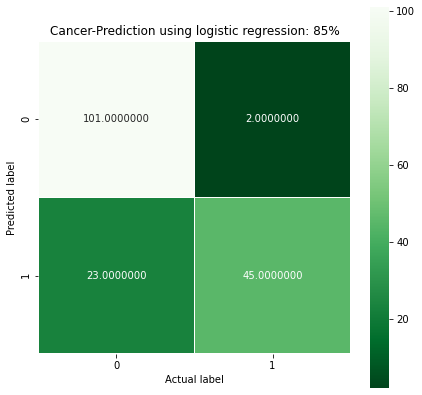

In [30]:
plt.figure(figsize=(7,7))
ax = sns.heatmap(cm, annot=True, fmt=".7f", linewidths=.5, square = True, cmap = 'Greens_r');
plt.xlabel('Actual label');
plt.ylabel('Predicted label');
plt.title(f'Cancer-Prediction using logistic regression: {log_reg:.0%}', size=12)
#plt.title(title, size = 15);
plt.savefig("bc_cnf_mtrx.png")
#sns.plt.show()

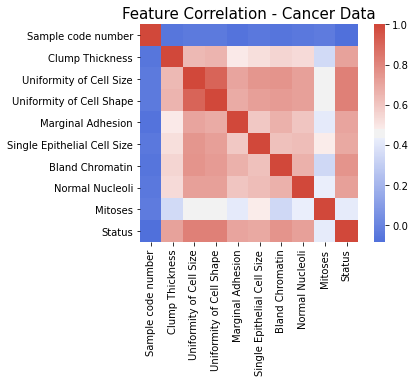

In [31]:
corr = df1.loc[:,df1.dtypes == 'int64'].corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, square = True,cmap=sns.diverging_palette(260, 15, as_cmap=True))
plt.title("Feature Correlation - Cancer Data", size = 15);
plt.savefig("bc_ftr_corr.png",bbox_inches='tight')
# shows 'sample code number need not be a fed to the model'

In [32]:
from sklearn.preprocessing import LabelEncoder
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y1_test)
encoded_y = label_encoder.transform(y1_test)

C:\Users\muthukumar\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
for label, original_class in zip(encoded_y, y1_test):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: [4]
Encoded Label: 1
------------
Original Class: [4]
Encoded Label: 1
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [4]
Encoded Label: 1
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [4]
Encoded Label: 1
------------
Original Class: [4]
Encoded Label: 1
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [4]
Encoded Label: 1
------------
Original Class: [2]
Encoded Label: 0
------------
Original Class: [4]
Encoded Label: 1
------------


In [32]:
!pip install keras

In [33]:
from keras.utils import to_categorical
labels=df1.loc[:,'Status'].values
y1_test=labels
# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
#one_hot_y

In [34]:
len(one_hot_y)

171

In [34]:
#Logistic regresion roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(one_hot_y[:,1], model3.predict(X_test))
print(logit_roc_auc)

0.8211736150770987


No handles with labels found to put in legend.


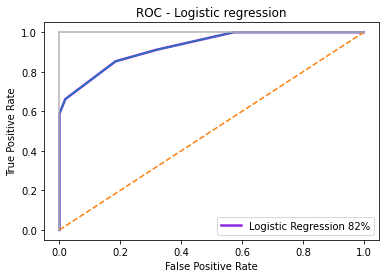

In [43]:
#fpr, tpr, thresholds = roc_curve(y1_test.flatten(), model3.predict_proba(X_test)[:,1], pos_label=2)
fpr, tpr, thresholds = roc_curve(one_hot_y[:,1], model3.predict_proba(X_test)[:,1])
lw=2.5
plt.figure()
ax = plt.gca()
plt.legend(loc="lower right")
#ROC calc for logisticRegression classifier
lgrc_disp = plt.plot(fpr, tpr, color='blueviolet',lw=lw,label=f'Logistic Regression {logit_roc_auc:.0%}')
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC - Logistic regression')
plt.legend(loc='lower right')
print("\n")
#lgrc_disp = metrics.plot_roc_curve(model3, X_test, y1_test, ax=ax,color='darkorange',lw=lw,alpha=0.8,drop_intermediate=False)
plt.savefig("bc_LGR-ROC.png",bbox_inches='tight')

KeyError: "None of [Int64Index([ 85,  96,  97,  98,  99, 101, 102, 103, 104, 105,\n            ...\n            673, 674, 675, 676, 677, 678, 679, 680, 681, 682],\n           dtype='int64', length=569)] are in the [columns]"

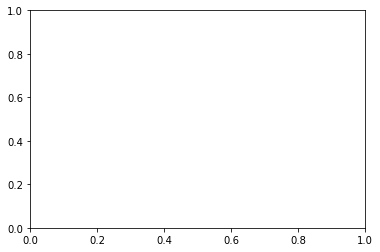

In [44]:

#Logistic Regression - Stratified fold -- ROC 
tprs1 = []
aucs1 = []
mean_fpr1 = np.linspace(0, 1, 100)
cv = StratifiedKFold(n_splits=6)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X,y)):
    model3.fit(X[train], y[train])
    viz = plot_roc_curve(model3, X[test], y[test], name='ROC fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
    interp_tpr1 = np.interp(mean_fpr1, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs1.append(interp_tpr1)
    aucs1.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
mean_tpr1 = np.mean(tprs1, axis=0)
mean_tpr1[-1] = 1.0
mean_auc1 = auc(mean_fpr1, mean_tpr1)
std_auc1 = np.std(aucs1)
ax.plot(mean_fpr1, mean_tpr1, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc1, std_auc1),lw=2, alpha=.8)
std_tpr1 = np.std(tprs1, axis=0)
tprs_upper1 = np.minimum(mean_tpr1 + std_tpr1, 1)
tprs_lower1 = np.maximum(mean_tpr1 - std_tpr1, 0)
ax.fill_between(mean_fpr1, tprs_lower1, tprs_upper1, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="ROC with cross validation - LogisticRegression")
ax.legend(loc="lower right")
plt.show()
plt.savefig("bc_LGR-ROC-2.png",bbox_inches='tight')

In [45]:
#type(y1_test)
#y1_test.shape
#y1_test_flattened = y1_test.flatten()
len(y1_test.flatten())

683

In [ ]:
#print(y1_test.flatten())

In [ ]:
#plt.figure()
#plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
#plt.plot([0, 1], [0, 1],'r--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
#plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
#plt.show()

In [ ]:
#sns.boxplot(x='diagnosis', y='area_mean', data=df2)

In [ ]:
#sns.boxplot(x='diagnosis', y='mean_area', data=df3)

# Data Exploration --- checking for imbalance in data

In [46]:
X, y = datasets.make_classification(random_state=0)
#print(y)
df1['Status'].value_counts()

2    444
4    239
Name: Status, dtype: int64

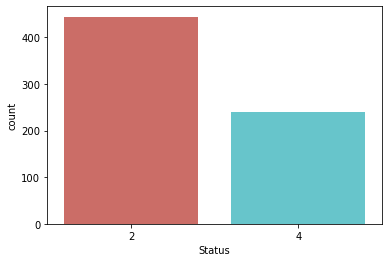

In [48]:
ax = sns.countplot(x="Status", data=df1, palette="hls")
plt.savefig("de_bc_dataImb.png",bbox_inches='tight')

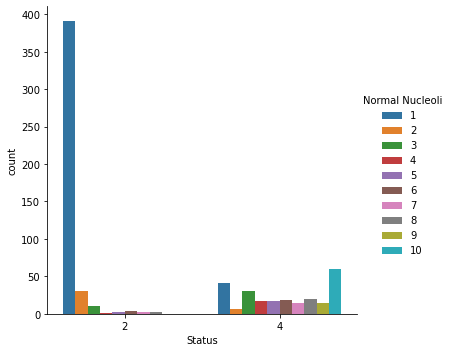

<Figure size 432x288 with 0 Axes>

In [49]:
#sns.countplot(x='Status', data=df1,palette='Set2')
g = sns.catplot(x="Status", hue="Normal Nucleoli", data=df1, kind="count", height=5, aspect=1);
plt.show()
plt.savefig("de_bc_dataImb-2.png",bbox_inches='tight')
#2 for benign, 4 for malignant

In [50]:
count_benign = len(df1[df1['Status']==2])
count_malignant = len(df1[df1['Status']==4])
pct_of_benign = count_benign/(count_benign+count_malignant)
print("benign percentage is",pct_of_benign*100)
pct_of_malignant = count_malignant/(count_benign+count_malignant)
print("malignant cancer percentage ", pct_of_malignant*100)

benign percentage is 65.00732064421669
malignant cancer percentage  34.99267935578331


In [51]:
df1.groupby('Status').mean()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
Status,,,,,,,,,,
2,1.115261e+06,2.963964,1.306306,1.414414,1.346847,2.108108,1.346847,2.083333,1.261261,1.065315
4,1.005121e+06,7.188285,6.577406,6.560669,5.585774,5.326360,7.627615,5.974895,5.857741,2.602510


In [ ]:
# SVC  Model & precision-recall curve 

Average precision-recall score - SVC: 0.92
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



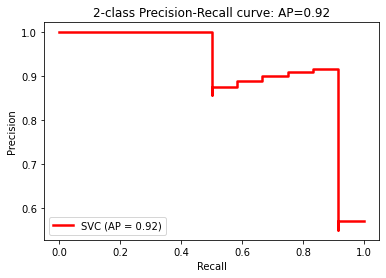

In [53]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn import datasets, metrics, model_selection, svm

X_train, X_test, y_train, y_test = model_selection.train_test_split( X, y, random_state=0)

#Training and fitting a SupportVectorClassifier, roc_curve calc
clf2 = svm.SVC(random_state=0)
clf2.fit(X_train, y_train)
SVC(random_state=0)
#svc_disp = metrics.plot_roc_curve(clf2, X_test, y_test, color='fuchsia',lw=lw,alpha=0.8)
y_score = clf2.decision_function(X_test)
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score - SVC: {0:0.2f}'.format(
      average_precision))

svc_disp = plot_precision_recall_curve(clf2, X_test, y_test, lw=2.5, color='red')
svc_disp.ax_.set_title('2-class Precision-Recall curve: '  'AP={0:0.2f}'.format(average_precision))

#Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.
#In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.
svc_predictions = clf2.predict(X_test)
print(classification_report(y_test, svc_predictions))

plt.savefig("bc_svc-PrRc.png",bbox_inches='tight')

# Random Forest Classifier

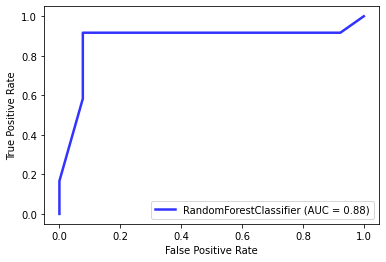

In [54]:
#Training and fitting a RandomForestClassifier, roc_curve calc
rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(X_train, y_train)
ax = plt.gca()
rfc_disp = metrics.plot_roc_curve(rfc, X_test, y_test, ax=ax, color='blue',lw=lw, alpha=0.8)

In [ ]:
#results = model3.predict_proba(X_test)
#print(results)

In [ ]:
#len(results)

In [ ]:
#type(results)

In [ ]:
#result1 = model3.predict_proba(X_test)[:,1]
#result1

In [ ]:
#len(result1)

In [ ]:
#print(y1_train)
#len(y1_train)

# ROC with SVC

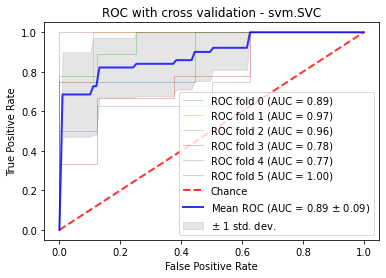

<Figure size 432x288 with 0 Axes>

In [55]:
from sklearn.model_selection import StratifiedKFold
# Add noisy features
random_state = np.random.RandomState(0)
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
cv = StratifiedKFold(n_splits=6)
clf3 = svm.SVC(kernel='linear', probability=True,random_state=random_state)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots()
for i, (train, test) in enumerate(cv.split(X, y)):
    clf3.fit(X[train], y[train])
    viz = plot_roc_curve(clf3, X[test], y[test], name='ROC fold {}'.format(i),alpha=0.3, lw=1, ax=ax)
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(mean_fpr, mean_tpr, color='b',label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],title="ROC with cross validation - svm.SVC")
ax.legend(loc="lower right")
plt.show()
plt.savefig("bc_SVC-ROC-Crossval.png",bbox_inches='tight')

In [64]:
print('Accuracy of cancer prediction using XGBClassifier:' + str(accuracy_score(y_test, y_pred)*100))

print(f"MSE from Linear Regression: {MSE}, R2 from Linear Regression: {r2}")

print('Accuracy of the prediction using Logistic Regression:' + str(accuracy_score(y1_test, predictions)*100))
from sklearn.metrics import classification_report
print("\n")
print('Classification report - LogisticRegression:'+ classification_report(y1_test, predictions))

#Precision-Recall is a useful measure of success of prediction when the classes are very imbalanced.
#In information retrieval, precision is a measure of result relevancy, while recall is a measure of how many truly relevant results are returned.

print('Average precision-recall score - SVC: {0:0.2f}'.format(average_precision))

print('Classification report - SVC:'+ classification_report(y_test, svc_predictions))

Accuracy of cancer prediction using XGBClassifier:97.8102189781022
MSE from Linear Regression: 8.045723251972486, R2 from Linear Regression: -4.275391888987753


ValueError: Found input variables with inconsistent numbers of samples: [683, 171]